<a href="https://colab.research.google.com/github/ozaanme/LeetCode-Easy-Solutions/blob/main/Facial_keypoint_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
! pip install fastbook
from fastai.vision.all import * 
from fastbook import * 

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.61 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: tr-TR;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3486/31310/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1654548260&Signature=KleIP3dgUyRllHFrOuoF9LOri1ha6ZV4u4ipaCnK0awIgWY5pBhpuh51fGjuL0fWBP3Hyny2d3Us1fXfkGsLd0Yvytv2W89Eed9Wh%2B0PXar3za2szH%2FMfxaGMQfWrbeHLVE42ocjGUvfT8fNSagvdjrpYqQiNnta%2F2%2BC0gNjhbzf%2Fu4tmwDrf%2Fb9fEoqP%2BYKZKn1Yn3vfIFiHWLAzs7CUDlCAX6G0UKgNZWASLBe%2FgLFUmJVdLZe24MhkbxRnnAii6PjBfCWc41%2FNwqBAEYSn7LG8rxu4A1fQVz8EPw0h%2B%2BHB8R9qSWZ68r5KGPql2YclGdnOJ8mz0n7wJHVhe3b3g%3D%3D&response-content-disposition=attachment%3B+filename%3Dfacial-keypoints-detection.zip" -c -O 'facial-keypoints-detection.zip'

--2022-06-04 01:05:53--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3486/31310/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1654548260&Signature=KleIP3dgUyRllHFrOuoF9LOri1ha6ZV4u4ipaCnK0awIgWY5pBhpuh51fGjuL0fWBP3Hyny2d3Us1fXfkGsLd0Yvytv2W89Eed9Wh%2B0PXar3za2szH%2FMfxaGMQfWrbeHLVE42ocjGUvfT8fNSagvdjrpYqQiNnta%2F2%2BC0gNjhbzf%2Fu4tmwDrf%2Fb9fEoqP%2BYKZKn1Yn3vfIFiHWLAzs7CUDlCAX6G0UKgNZWASLBe%2FgLFUmJVdLZe24MhkbxRnnAii6PjBfCWc41%2FNwqBAEYSn7LG8rxu4A1fQVz8EPw0h%2B%2BHB8R9qSWZ68r5KGPql2YclGdnOJ8mz0n7wJHVhe3b3g%3D%3D&response-content-disposition=attachment%3B+filename%3Dfacial-keypoints-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing

In [ ]:
!unzip facial-keypoints-detection.zip

In [ ]:
!unzip test.zip
!unzip training.zip

In [9]:
path = Path.cwd()
train = path/'training.csv'
test = path/'test.csv'

train_df = pd.read_csv(train, header='infer')
test_df = pd.read_csv(test)


#test_df.head() 
#train_df.describe() 
train_df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [10]:
def str2img(row):
  imarr = np.fromstring(row.Image, dtype='int32', sep=' ').astype(np.int32)
  i = Image.fromarray(imarr.reshape(-1, 96)).convert('P')
  return PILImage(i)

# how to get the keypoints from a row of the dataset
def row2points(r): 
  a = np.reshape(r[0:30].values, (15,2)).astype(np.float64)
  return a

def get_y(r):
    return [
    [r['nose_tip_x'],r['nose_tip_y']],
    [r['left_eye_center_x'],r['left_eye_center_y']],
    [r['right_eye_center_x'],r['right_eye_center_y']],
    ]

In [11]:
train_df = train_df.fillna(method='ffill')

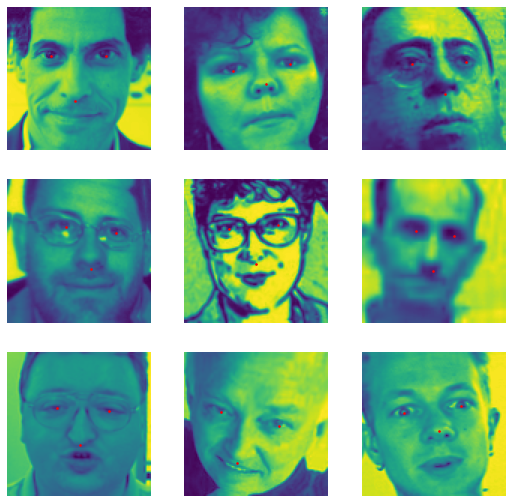

In [12]:
db = DataBlock(
    blocks = (ImageBlock, PointBlock),
    get_x = str2img,
    get_y = get_y,
    splitter = RandomSplitter(valid_pct=0.15, seed=42),
    batch_tfms = aug_transforms(do_flip=False, max_zoom=1.0), # should prob adjust these params    
)
dls = db.dataloaders(train_df)
dls.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


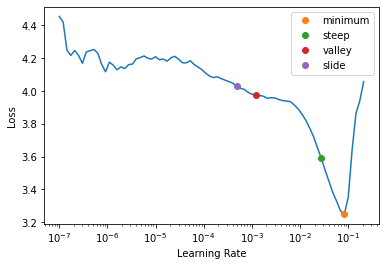

In [17]:
learn = cnn_learner(dls, resnet152)
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [18]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.444685,0.644078,00:38


epoch,train_loss,valid_loss,time
0,0.880019,0.190302,00:51
1,0.560578,0.211350,00:54
2,0.315997,0.024094,00:53
3,0.203571,0.326224,00:51
4,0.145911,0.375940,00:51
5,0.113345,0.083210,00:51
6,0.095933,0.020558,00:51
7,0.090197,0.017708,00:53


In [21]:
preds = [learn.predict(PILImage(str2img(test_df.iloc[idx])))[0] for idx in range(len(test_df))]
preds

[TensorPoint([[47.3983, 55.1339],
         [63.1883, 37.1588],
         [32.1243, 38.0632]]), TensorPoint([[50.7112, 58.7521],
         [66.1742, 40.2576],
         [32.9417, 38.6214]]), TensorPoint([[46.3044, 55.9676],
         [62.4389, 39.9189],
         [33.7798, 38.4039]]), TensorPoint([[48.6935, 60.8087],
         [62.4956, 39.7327],
         [31.0836, 39.8855]]), TensorPoint([[48.7310, 58.2684],
         [65.8796, 36.7948],
         [29.6040, 39.7664]]), TensorPoint([[47.1541, 58.8348],
         [63.3712, 38.9790],
         [29.8963, 40.5932]]), TensorPoint([[49.6125, 58.0773],
         [65.1270, 37.0238],
         [31.0497, 39.3000]]), TensorPoint([[49.9463, 60.7203],
         [65.6190, 39.3255],
         [30.8230, 38.7031]]), TensorPoint([[46.4835, 56.4247],
         [63.9647, 40.8371],
         [31.2424, 38.9897]]), TensorPoint([[46.2631, 54.7502],
         [64.1710, 36.9831],
         [30.0408, 36.8774]]), TensorPoint([[48.0873, 54.4373],
         [65.3570, 39.6651],
       